In [4]:
import pandas as pd
df = pd.read_csv("./Advertising.csv")

In [6]:
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


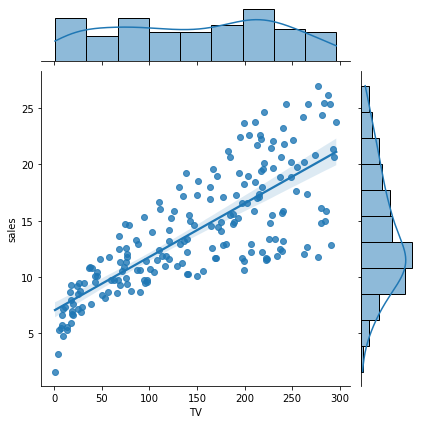

In [11]:
import seaborn as sns
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg");

In [15]:
from sklearn.linear_model import LinearRegression
x = df[["TV"]]
y = df[["sales"]]
reg = LinearRegression()
model = reg.fit(x, y)

In [16]:
#r-squared
model.score(x, y)

0.611875050850071

In [20]:
pred_y = pd.DataFrame(model.predict(x))

In [24]:
epsilon = pd.concat([y, pred_y], axis = 1)
epsilon.columns = ["real_y", "pred_y"]

In [25]:
epsilon[0:10]

,real_y,pred_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [26]:
epsilon["eps"] = epsilon["real_y"] - epsilon["pred_y"]

In [27]:
epsilon[0:10]

,real_y,pred_y,eps
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [28]:
epsilon["MSE"] = epsilon["eps"]**2

In [29]:
epsilon[0:10]

,real_y,pred_y,eps,MSE
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [32]:
import numpy as np
np.mean(epsilon["MSE"])

10.512652915656757